# Decision Tree Classifier Building in Scikit-learn
We will use a popular machine learning toolkit called sklearn to create a decision tree.

In [20]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [21]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("https://raw.githubusercontent.com/modengann/Data-sets/master/diabetes.csv", header=None, names=col_names, skiprows=1)

In [22]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [32]:
pima.shape

(768, 9)

One important point: label is the column that says whether or not the person has diabetes.

In [23]:
pima.dtypes

pregnant      int64
glucose       int64
bp            int64
skin          int64
insulin       int64
bmi         float64
pedigree    float64
age           int64
label         int64
dtype: object

## Feature selection
We need to divide the data into two parts: dependent (target) variable and independent (feature) variables.

In [24]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima["label"] # Target variable

In [25]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: label, Length: 768, dtype: int64

Use X to keep track of features and y to keep track of targets is standard convention for Machine Learning algorithms.

## Training and Test Split
Same as with our monkeys, we want to divide our data into two parts: data we will use to train and data we will use to test our model.

SKLearn has a great tool for splitting data: train_test_split(). We pass in the following as parameters: X (feature variables), y (target variables), and test_size = 0.3 (70-30 split for training to test). This method will return four data objects: 2 DataFrames for the Xs and 2 Series for the ys.

Why do you think the Xs will be DataFrames while the ys will be Series?

In [26]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [27]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


So much happens under the hood in the previous code block.

Line 1: Create a Decision Tree object

Line 2: We do all of our training in one line of code: clf = clf.fit(X_train,y_train).  PYTHON MAGIC!

Line 3: We use our reserve X test data to make predictions for y. We can then compare those predicted values with the actual values that we held in reserve.

In [28]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6883116883116883


SKLearn also comes with a built-in metric to compare your predicted scores with the actual outcomes to give you an accuracy rating

In [30]:
!pip install graphviz
!pip install pydotplus

Like many machine learning algorithms, the decision tree can feel a bit like a black box. We put values in, train the data, and out pops an accuracy score. However, the benefit of a decision tree is that we can produce an interpretable result quite easily.

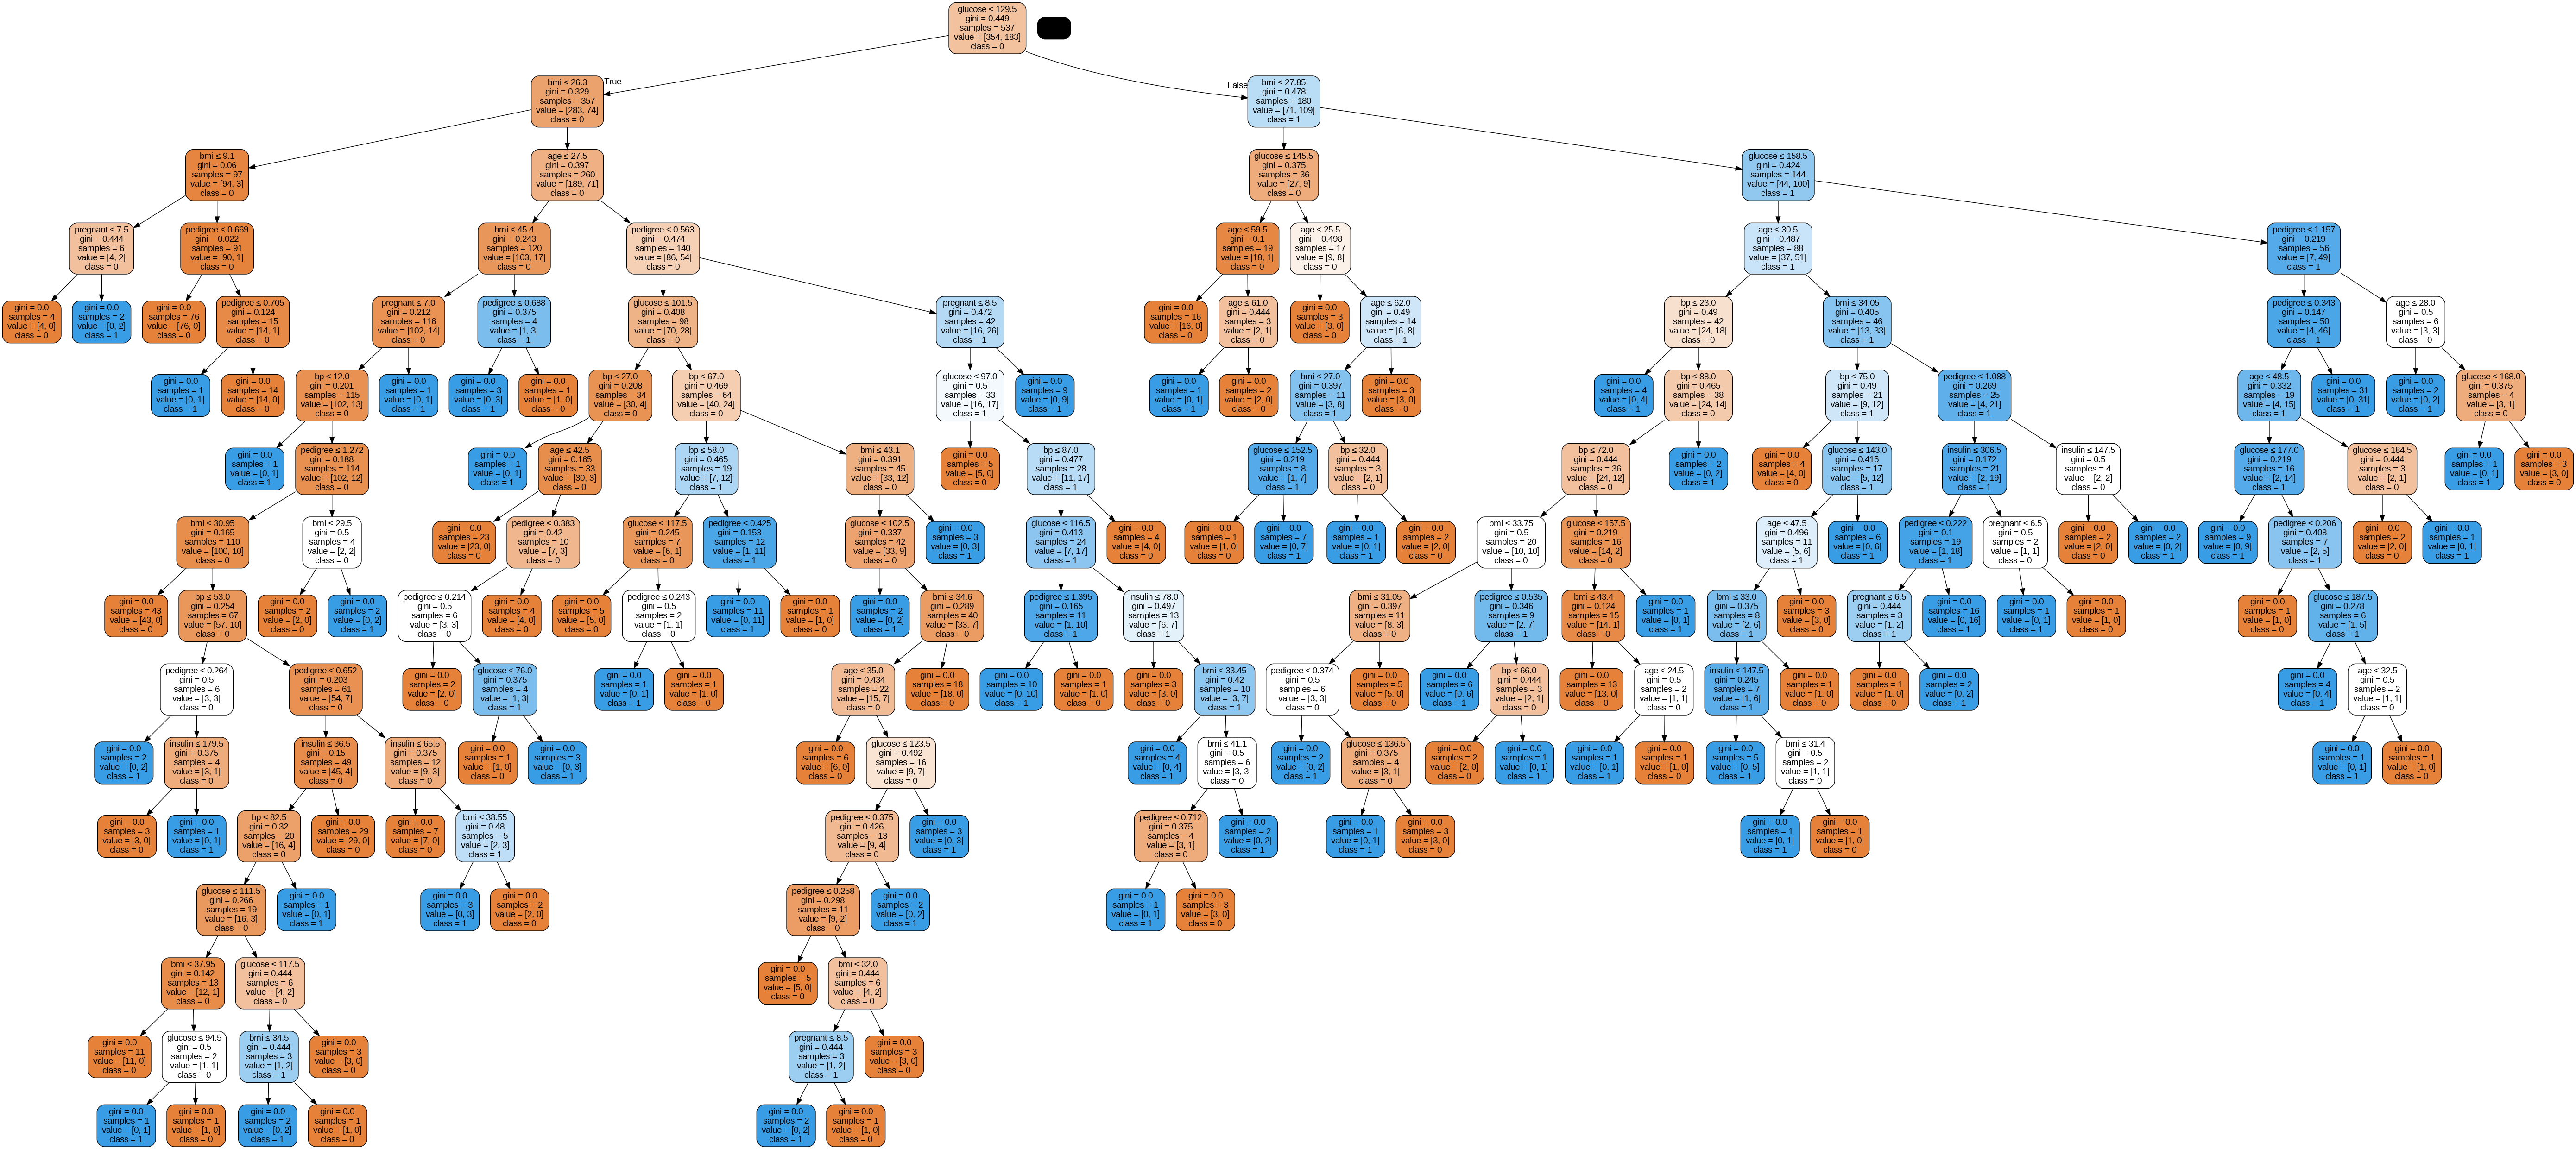

In [34]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())


## Gini
If you zoom in on the tree above, you can see the term "gini" in each box. Gini is a measure of impurity in the data. We can see that in each of the leafs above, the gini score is 0 which means there is no impurity in each. This likely means that we have overfitting. Our model matches the data too well!

# Optimizing Tree Performance

We need to prune our tree. Pruning a tree means to remove branches from the tree to decrease overfitting and increase generalizability.

There are a few ways we can prune our tree but the easiest thing we can do to our tree is to reduce the maximum depth of our tree.

In [43]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7575757575757576


You can tweak the max_depth value to see what happens with the accuracy.

Let's look again at our visualization chart. I'll break down the code for you:

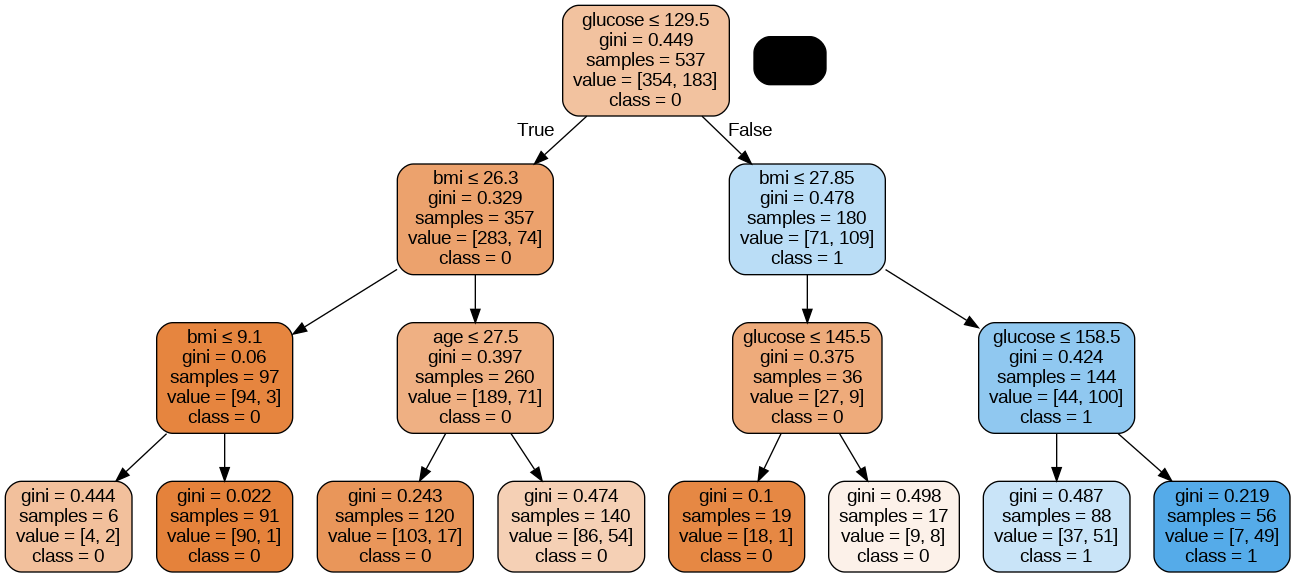

In [44]:
#Imported the required libraries.
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

#Create a text representation of the decision tree stored in a data type dot_data
dot_data = StringIO()

#Exported the decision tree to the dot format using the export_graphviz function and write the output to the dot_data buffer.
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])

#Created a graph object from the dot format representation of the decision tree stored in the dot_data buffer.
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

#Write and display a png file
graph.write_png('diabetes.png')
Image(graph.create_png())